# Comenzando con Pandas. Series

Cuaderno de prácticas con PANDAS

In [ ]:
import pandas as pd
import numpy as np
# Creando un vector de numeros aleatorios usando Numpy
g = np.random.default_rng(0)
# Crenado una serie simplemente pasando el generador que genera 10 numeros entre 70 y 100
s = pd.Series(g.integers(70, 101,10)) # hasta 101 porque el 101 no se incluye, se queda en 100
s.index = 'Sep Oct Nov Dec Jan Feb Mar Apr May Jun'.split() # Ahora se indexa dividiendo el string entre comillas
print(s)

Sep    96
Oct    89
Nov    85
Dec    78
Jan    79
Feb    71
Mar    72
Apr    70
May    75
Jun    95
dtype: int64


Remember that the np.random.randint function returns numbers that include the lower bound but exclude the upper bound.

In [ ]:
# usando Random standard de python
import random
b=random.randint(0, 100)
print(b)
#Si queremos generar un vector
b=[random.randint(0, 100) for i in range(0,10)]
print(b)

7
[82, 68, 98, 80, 64, 17, 83, 69, 11, 49]


Una forma alternativa de crear series

In [ ]:
months = 'Sep Oct Nov Dec Jan Feb Mar Apr May Jun'.split()
s2 = pd.Series(g.integers(70, 101, 10), index=months)
print(s2)

Sep     90
Oct     98
Nov     85
Dec     88
Jan    100
Feb     92
Mar     89
Apr     86
May     87
Jun     98
dtype: int64


Ahora vamos a calcular las medias de estas series

In [ ]:
print(f'Yearly average s: {s.mean()}')
print(f'Yearly average s2: {s2.mean()}')

Yearly average s: 81.0
Yearly average s2: 91.3


Ahora la media de los 5 primeros usando iloc para acceder

In [ ]:
print(f'Media de los 5 primeros de s usando iloc : {s.iloc[:5].mean()}')
print(f'Media de los 5 primeros de s2 usando iloc : {s2.iloc[:5].mean()}')

Media de los 5 primeros de s usando iloc : 85.4
Media de los 5 primeros de s2 usando iloc : 92.2


Lo mismo pero ahora explicitando el índice

In [ ]:
first_half_average = s.loc['Sep':'Jan'].mean()
print(f'Media de los 5 primeros de s usando loc : {first_half_average}')

Media de los 5 primeros de s usando loc : 85.4


The endpoint of a slice is normally “up to and not including,” but in this case, the slice endpoint is “up to and including.” That is, our 'Sep':'Jan' slice includes the value for January.

In [ ]:
second_half_average = s['Feb':'Jun'].mean() # Si no se pone loc es como si se usara loc por defecto
print(f'Media de la segunda mitad del año: {second_half_average}')

Media de la segunda mitad del año: 76.6


Calculamos la mediana de las seríes

In [ ]:
print(f'Mediana de series s : {s.median()}')
print(f'Mediana de series s2 : {s2.median()}')

Mediana de series s : 78.5
Mediana de series s2 : 89.5


Tambien se pueden extraer un numero de elementos usando las funciones head() y tail(). Por ejemplo, para extraer los tres primeros o los tres últimos sería

In [ ]:
first_three=s.head(3)
last_three=s.tail(3)
print(f'Tres primeros de s : {first_three}')
print(f'Tres ultimos de s : {last_three}')


Tres primeros de s : Sep    96
Oct    89
Nov    85
dtype: int64
Tres ultimos de s : Apr    70
May    75
Jun    95
dtype: int64


Ahora vamos a calcular las desviaciones standard de las series

In [ ]:
S_std=s.std()
S2_std=s2.std()
print(f'Tres primeros de s : {S_std}')
print(f'Tres ultimos de s : {S2_std}')

Tres primeros de s : 9.72967967955095
Tres ultimos de s : 5.478239782184704


Otro método intersante es la suma

In [ ]:
S_sum=s.sum()
print(f'La suma de elemntos de s : {S2_std}')

La suma de elemntos de s : 5.478239782184704


Y si queremos sumar solo los tres primeros?

In [ ]:
S_sum=s.iloc[0:3].sum()
print(f'La suma de los tres primeros elemntos de s : {S_sum}')

La suma de los tres primeros elemntos de s : 270


Ahora vamos a seleccionar elementos de la serie s pero usando booleanos.
De alguna forma le vamos a decir que solo seleccione los que corresponden a posiciones 'True'. Esto se denomina máscara.

In [ ]:
s_bool=s.iloc[0:4]
print(s_bool)
# Ahora usamos la mácara
s_bool2=s_bool.loc[[True, True, False, False]]
print(s_bool2)

Sep    96
Oct    89
Nov    85
Dec    78
dtype: int64
Sep    96
Oct    89
dtype: int64


Con condiciones, extraemos los elementos de la serie usando .loc y una condición, en este caso que sean > 85

In [ ]:
print(s_bool.loc[s> 85])

Sep    96
Oct    89
dtype: int64


Vamos a usar lo anterior para extraer los valores de la serie s que están por debajo de la su media

In [ ]:
print(s.loc[s < s.mean()])
print(f'La media es :{s.mean()}')

Dec    78
Jan    79
Feb    71
Mar    72
Apr    70
May    75
dtype: int64
La media es :81.0


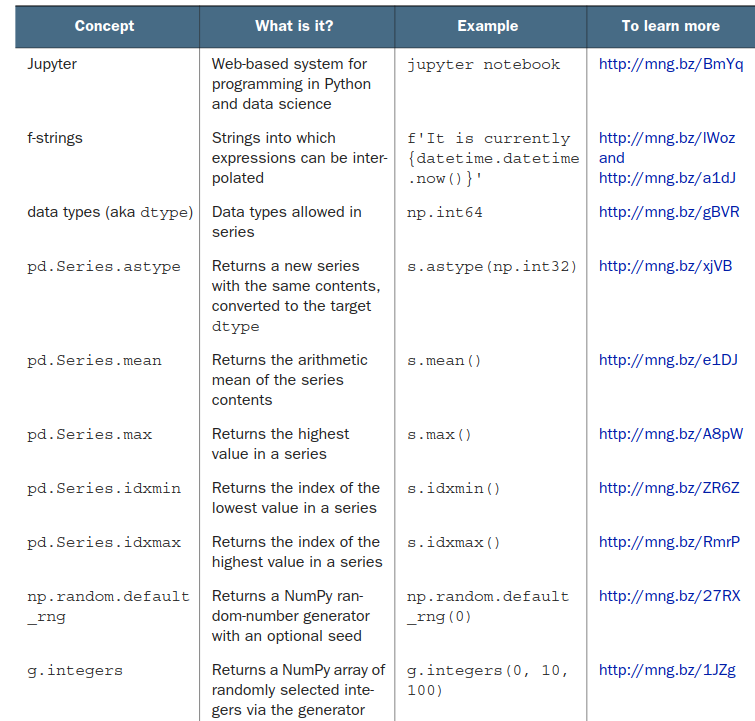

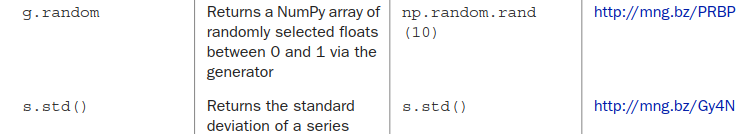

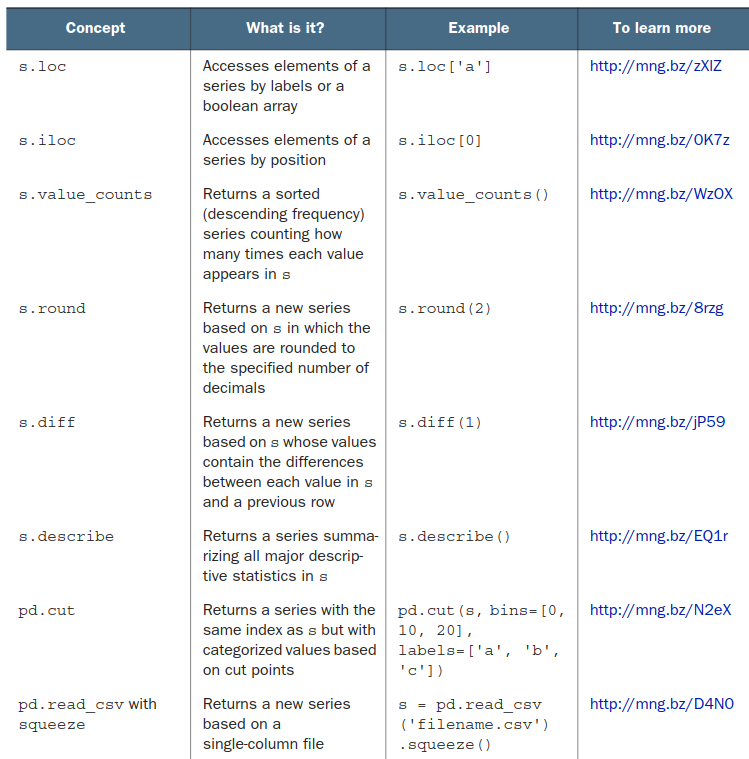

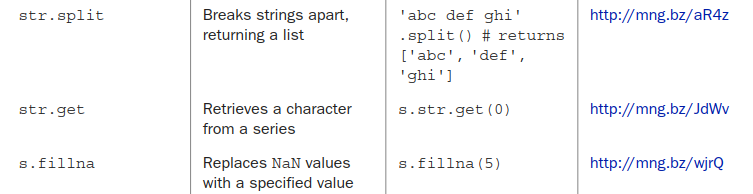

# Usando valores derivados de una distribución Normal para generar estadísticas descriptivas de una serie

In [ ]:
import numpy as np
import pandas as pd
g = np.random.default_rng(0)
s = pd.Series(g.normal(0, 100, 100_000))# generando valores de normal de media 100 y desviacion standard 100 (se generan 100.000 valores)
s.describe()

count    100000.000000
mean         -0.090825
std         100.013350
min        -449.411704
25%         -67.292120
50%          -0.414699
75%          67.636542
max         473.195769
dtype: float64

Jugando con los datos. Vamos a reemplazar el valor mínimo de esta serie con un nuevo valor que sea 5 veces el máximo, de manera que se alteraran los resultados de la descripción

In [ ]:
a=s.min()
print(a)

-449.4117040179167


Ahora cogemos el mínimo y lo cambiamos

In [ ]:
s.loc[s == s.min()] = 5*s.max() # para ello usamos una condición con .loc haciendo que seleccionemos el mínimo y le damos el nuevo valor

In [ ]:
s.describe()

count    100000.000000
mean         -0.062671
std         100.282770
min        -402.315865
25%         -67.288054
50%          -0.409289
75%          67.640758
max        2365.978844
dtype: float64

A diferencia de otras estructuras de datos de Python, en Pandas los índices pueden estar repetidos. Vamos a ver un ejercicio para ver la utilidad de esto.
Generamos una serie con temperaturas de varias semana a partir de una normal de media 20 y desviación típica 5. Como las semanas se repiten, los días de la semana que actuaran como incices también se repiten.


In [ ]:
g = np.random.default_rng(0)
g.normal(20, 5, 28)

array([20.62865111, 19.33947568, 23.20211325, 20.52450059, 17.32165313,
       21.80797527, 26.52000023, 24.73540482, 16.48132382, 13.67289264,
       16.88362769, 20.2066299 ,  8.37484613, 18.90604168, 13.77044526,
       16.33866323, 17.27870509, 18.41849922, 22.05815268, 25.21256685,
       19.35732669, 26.83231735, 16.67402663, 21.75755035, 24.51735091,
       20.47006149, 16.28250375, 15.39137312])

Vamos a generar los índices a partir de un array de texto que dividimos usando caracter ' '. ->days = 'Sun Mon Tue Wed Thu Fri Sat'.split()

In [ ]:
days = 'Sun Mon Tue Wed Thu Fri Sat'.split()


Y ahora creamos la serie usando cuatro veces el array de días

In [ ]:
s = pd.Series(g.normal(20, 5, 28),index=days*4)
print(s)

Sun    22.149318
Mon    23.480214
Tue    14.079410
Wed    16.691487
Thu    17.817824
Fri    14.150990
Sat    28.696839
Sun    17.520446
Mon    21.644848
Tue    18.707137
Wed    27.917364
Thu    26.601805
Fri    23.166763
Sat     8.982451
Sun    20.260145
Mon    23.418431
Tue    25.019808
Wed    16.910465
Thu    29.110057
Fri    13.397845
Sat    16.692360
Sun    24.675250
Mon    20.245273
Tue    30.011963
Wed    20.942596
Thu    16.834030
Fri    18.112182
Sat    14.544269
dtype: float64


Como g.normal devuelve flotantes, y preferimos usar enteros, vamos a convertir los resultados a enteros y regenerar la serie

In [ ]:
g = np.random.default_rng(0)
s = pd.Series(g.normal(20, 5, 28),index=days*4).round().astype(np.int8) # Usamos astype y decimos que son enteros de 8 bits
# con 8 bits se pueden representar enteros desde -2^9 a 2^9
print(s)

Sun    21
Mon    19
Tue    23
Wed    21
Thu    17
Fri    22
Sat    27
Sun    25
Mon    16
Tue    14
Wed    17
Thu    20
Fri     8
Sat    19
Sun    14
Mon    16
Tue    17
Wed    18
Thu    22
Fri    25
Sat    19
Sun    27
Mon    17
Tue    22
Wed    25
Thu    20
Fri    16
Sat    15
dtype: int8


Y ahora extraemos por ejemplo la temperatura de todos los sábados

In [17]:
s.loc['Sat']

Sat    27
Sat    19
Sat    19
Sat    15
dtype: int8

The data is in the file "taxi-passenger-count.csv", available along with the other data
files used in this course. The data comes from 2015 data I retrieved from New York
City’s open data site, where you can get enormous amounts of information about taxi
rides in New York City over the last few years. This file shows the number of passengers
in each of 100,000 rides.
We also set the header parameter to None, indicating that the first line in the file should not be taken as a column name but rather as data to be included in our calculations.

In [31]:
s = pd.read_csv('taxi-passenger-count.csv',header=None).squeeze()

Ahora podemos ver cuantos viajes en 2015 se hicieron con 3 o más pasajeros

In [32]:
print(s.loc[s >= 3])

7       4
10      3
27      5
30      6
31      5
       ..
9961    6
9963    6
9983    3
9989    6
9997    6
Name: 0, Length: 1477, dtype: int64


Como son muchos, mejor los contamos

In [35]:
print(s.loc[s >=3 ].count())

1477


Si queremos obtener la distribución completa de tipos de viajes, podemos usar value_counts()

In [37]:
s.value_counts()

0
1    7207
2    1313
5     520
3     406
6     369
4     182
0       2
Name: count, dtype: int64

Y si sólo queremos por ejemplo conocer los de números pares, podríamos pasar los valores detras de value_counts-> s.value_counts()([2,4,6])

In [40]:
s.value_counts()[[2,4,6]] # Ojo con los dobles corchetes

0
2    1313
4     182
6     369
Name: count, dtype: int64

Y si en lugar de obtener el conteo queremos calcular el porcentaje. podemos usar normalize

In [41]:
s.value_counts(normalize=True)[[2, 4 ,6]]

0
2    0.131313
4    0.018202
6    0.036904
Name: proportion, dtype: float64

Vamos ahora a trabajar con las distancias recorridas por los taxis, no con el número de pasajeros. Vamos ahora a usar el archivo de datos "taxi-distance.csv."